In [46]:
import numpy as np
import matplotlib.pyplot as plt 

# Dynamics of a particle

$$
\sum \mathbf{F}_i = m \mathbf{a}
$$

In [58]:
class state:
    def __init__( self, position, velocity):
        if len(position) != len(velocity):
            raise ValueError(f"position {position} and velocity {velocity} must have the same dimensions")

        self.position = position
        self.velocity = velocity 

class particle:
    def __init__( self, mass, state ):
        if mass <= 0:
            raise ValueError( f"Particle mass should be strictly positive. Received: {mass}")
        self.mass = mass
        self.state = state

    def evolve(self, force, dt):
        m = self.mass
        x = self.state.position
        v = self.state.velocity
        F = force

        self.state.position += v*dt
        self.state.velocity += F( x, v ) / m * dt

In [64]:
N = 100
T = 10
t = np.linspace(0,T,N)
dt = t[1]-t[0]
x = np.zeros_like(t)
v = np.zeros_like(t)
x[0] = 1
v[0] = 0
M = 2

p = particle( M, state( np.array((x[0],)), np.array((v[0],)) ) )

def F(x, v):
    return -x

In [65]:
for i in range(1,N):
    p.evolve(F,dt)
    x[i] = p.state.position
    v[i] = p.state.velocity

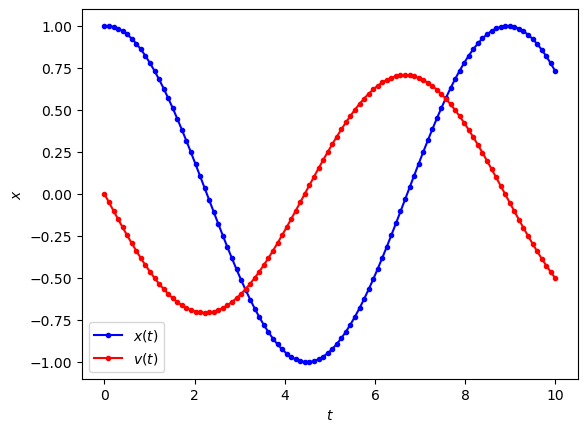

In [67]:
plt.plot(t,x, '.-b', label='$x(t)$')
plt.plot(t,v, '.-r', label='$v(t)$')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()